In [1]:
import os
import numpy as np
import tifffile as tiff
import pyvista as pv
import scipy.ndimage

In [2]:
def load_data(tiff_directory, downscale = bool, downscale_factors = (0.5, 0.5, 0.5)):
    # Read all TIFF files and stack them into a 3D volume
    tiff_files = sorted([f for f in os.listdir(tiff_directory) if f.endswith('.tif')])
    volume_data = np.array([tiff.imread(os.path.join(tiff_directory, f)) for f in tiff_files])

    if downscale:
        volume_data = scipy.ndimage.zoom(volume_data, downscale_factors, order=1)

    # Create a PyVista UniformGrid
    volume = pv.ImageData()
    volume.dimensions = volume_data.shape
    volume["TIFFImage"] = volume_data.flatten(order="F")  # Flatten in Fortran order

    volume.spacing = (1, 1, 1)  # Set spacing; adjust as needed

    return volume

c:\Users\nerea\anaconda3\envs\SCenv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


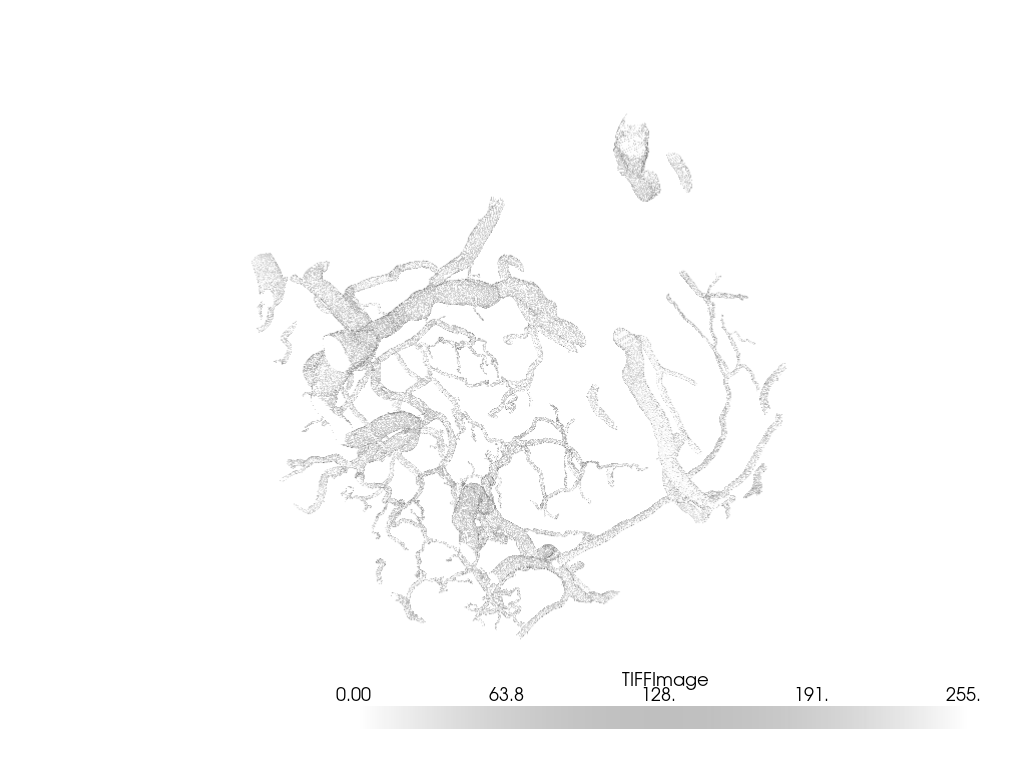

In [3]:
folder = 'data/labels'
volume = load_data(folder, downscale=True, downscale_factors=(0.5, 0.5, 0.5))

# Visualize the volume
plotter = pv.Plotter()
plotter.add_volume(volume, cmap="gray")
plotter.show()

# Save the volume as a VTK file
vtk_file_path = 'volume.vtk'
volume.save(vtk_file_path)
